Load Dependencies 

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [2]:
import pandas as pd
import numpy as np

import pickle as pk

import warnings
warnings.filterwarnings("ignore")


from bs4 import BeautifulSoup
import unicodedata
import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud



df = pd.read_csv('Dataset.csv')
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['class', 'message']]

X_mssg = df['message'].astype(str)
Y_label = df['class'].astype(str)

df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X_mssg.iloc[0:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [5]:
Y_label.iloc[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

Converting to lowercase 

In [6]:
df['Clean_Messages'] = X_mssg.str.lower()
df.head()

,class,message,Clean_Messages
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


Removing Punctuation 
[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]

In [7]:
def remove_punctuation(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [8]:
df['removed_punctuation'] = df['Clean_Messages'].apply(remove_punctuation)
df.head()

,class,message,Clean_Messages,removed_punctuation
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...


Tokenization

In [9]:
#word tokenizer
df['word_tokenized'] = df['Clean_Messages'].apply(word_tokenize)

#sentence tokenizer
df['sentence_tokenized'] = df['Clean_Messages'].apply(sent_tokenize)
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar..."


Removing stopwords 

In [10]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
def remove_stopwords(text):
    '''
    Removes Stop Words (also capitalized) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without Stop Words
    ''' 
    
    # check in lowercase 
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)    
    return text

In [12]:

df['Message_WO_StopWords'] = df['word_tokenized'].apply(remove_stopwords)
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though"


Stemming

In [13]:
ps = PorterStemmer()

def stemming(text):
  stem_text = [ps.stem(word) for word in text]
  return stem_text

In [14]:
df['stemmed_message'] = df['Message_WO_StopWords'].apply(lambda x: stemming(x))
#df['stemmed_message'].tolist()
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords,stemmed_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...,"[o, k, , l, a, r, , ., ., ., , j, o, k, i, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...,"[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...,"[u, , d, u, n, , s, a, y, , e, a, r, l, y, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though","[n, a, h, , n, ', t, , t, h, i, n, k, , g, ..."


n-grams

In [15]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  #print("Sentence after removing stopwords:",words) uncomment to see a more specific change in print output statements.
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


In [16]:
df['n_grams_for_message'] = df['Message_WO_StopWords'].apply(generate_N_grams)
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords,stemmed_message,n_grams_for_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ...","[go, jurong, point, ,, crazy, .., available, b..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...,"[o, k, , l, a, r, , ., ., ., , j, o, k, i, ...","[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...,"[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...,"[u, , d, u, n, , s, a, y, , e, a, r, l, y, ...","[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though","[n, a, h, , n, ', t, , t, h, i, n, k, , g, ...","[nah, n't, think, goes, usf, ,, lives, around,..."


Converting to integer index

In [17]:
df['tokenized_word_index'] = df['word_tokenized'].index
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords,stemmed_message,n_grams_for_message,tokenized_word_index
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ...","[go, jurong, point, ,, crazy, .., available, b...",0
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...,"[o, k, , l, a, r, , ., ., ., , j, o, k, i, ...","[ok, lar, ..., joking, wif, u, oni, ...]",1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...,"[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",2
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...,"[u, , d, u, n, , s, a, y, , e, a, r, l, y, ...","[u, dun, say, early, hor, ..., u, c, already, ...",3
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though","[n, a, h, , n, ', t, , t, h, i, n, k, , g, ...","[nah, n't, think, goes, usf, ,, lives, around,...",4


In [18]:
df['tokenized_word_index'].dtypes

dtype('int64')

Set Hyperparameters/Load model dependencies

In [19]:
import keras
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import EarlyStopping
from keras.layers import SpatialDropout1D, Conv1D, GlobalMaxPooling1D  
from keras.layers import SimpleRNN
from keras.layers import LSTM

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline

In [20]:
epochs = 8
batch_size = 128
n_dimensions = 64
n_unique_words = 5000
stop_words = 50
max_mssg_length = 100
pad_type=trunc_type = 'pre'
n_dim = 64
n_dense = 64
dropout = 0.5

drop_embed = 0.2 # convolutional model 
# convolutional layer architecture:
n_conv = 256 # filters, a.k.a. kernels
k_conv = 3 # kernel length


optimizer = 'adam'

output_dir = 'model_output/dense' # Store model's parameters after each epoch

In [21]:
X = df['message'].values
y = df['class'].values

print(X)
print(y)


label = LabelEncoder()
y=label.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, shuffle = True)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ...
 'Hi babe its me thanks for coming even though it didnt go that well!i just wanted my bed! Hope to see you soon love and kisses xxx'
 'So gd got free ice cream... I oso wan...'
 'Pls give her prometazine syrup. 5mls then  &lt;#&gt; mins later feed.']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [22]:
t = Tokenizer()
t.fit_on_texts(X_train)

# integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[48, 30, 248, 75, 19], [222, 47, 21, 108, 625, 1529, 2292, 1800, 1, 316, 8, 1801]]


number of label_value_counts() of the data set to show the distribution of labels.

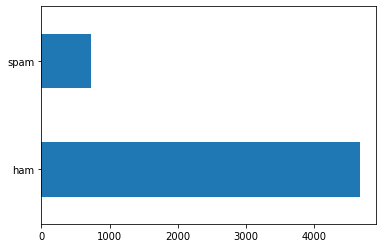

In [23]:
Y_label.value_counts().plot(kind='barh')

Preprocess Data

In [24]:
padded_train = pad_sequences(encoded_train, maxlen = max_mssg_length,
                        padding = 'post', truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = max_mssg_length,
                        padding = 'post', truncating = trunc_type, value = 0)
print(padded_train)

[[  48   30  248 ...    0    0    0]
 [ 222   47   21 ...    0    0    0]
 [ 720   13  985 ...    0    0    0]
 ...
 [7333   30 7334 ...    0    0    0]
 [ 714 1773 1182 ...    0    0    0]
 [   8  162   19 ...    0    0    0]]


Bi-LSTM Model

In [25]:
#new imports
from keras.layers import Bidirectional

Hyperparameters for Bi-LSTM

In [26]:
ouput_dir = 'model_output/biLSTM'
epochs = 6
batch_size = 128

n_dim = 64
n_unique_words = 10000
max_mssg_length = 200 
pad_type = trunc_type = 'pre'

#LSTM layer arch:
n_lstm = 256
drop_lstm = 0.2

In [27]:
padded_train = pad_sequences(encoded_train, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


DNN architecture 

In [28]:
modelBI_LSTM = Sequential()

#1st hidden layer 
modelBI_LSTM.add(Embedding(n_unique_words, n_dim, input_length = max_mssg_length))
modelBI_LSTM.add(SpatialDropout1D(drop_embed))

#2nd hidden layer: 
modelBI_LSTM.add(LSTM(n_lstm, dropout=drop_lstm))

#Output layer
modelBI_LSTM.add(Dense(1, activation='sigmoid')) 

#LSTM layer parameters double due to both reading directions
modelBI_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 64)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


Configer bi-LSTM model

In [29]:
modelBI_LSTM.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

Train bi-LSTM model

In [30]:
history = modelBI_LSTM.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/6
30/30 [==============================] - 8s 49ms/step - loss: 0.3377 - accuracy: 0.8755 - val_loss: 0.1352 - val_accuracy: 0.9673
Epoch 2/6
30/30 [==============================] - 1s 31ms/step - loss: 0.0608 - accuracy: 0.9857 - val_loss: 0.0883 - val_accuracy: 0.9784
Epoch 3/6
30/30 [==============================] - 1s 30ms/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.0772 - val_accuracy: 0.9747
Epoch 4/6
30/30 [==============================] - 1s 31ms/step - loss: 0.0214 - accuracy: 0.9942 - val_loss: 0.0593 - val_accuracy: 0.9852
Epoch 5/6
30/30 [==============================] - 1s 31ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 6/6
30/30 [==============================] - 1s 31ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0641 - val_accuracy: 0.9864


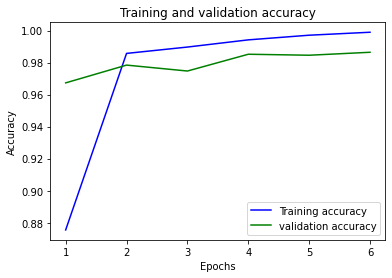

In [31]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

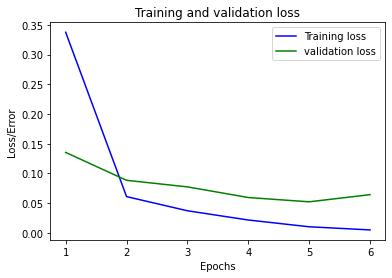

In [32]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

Evaluate and ROC-AUC

In [33]:
modelBI_LSTM.load_weights(output_dir+"/weights.06.hdf5")
y_hat = modelBI_LSTM.predict(padded_test)

51/51 [==============================] - 1s 9ms/step


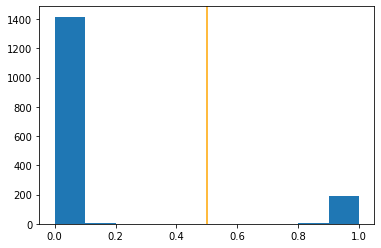

In [34]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [35]:
"{:0.2f}".format(roc_auc_score(y_test,y_hat)*100.0)

'99.06'

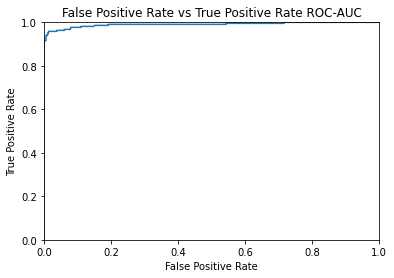

In [36]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

*Stacked* Bi-LSTM

hpyerparameters for stacked bi-lstm

In [37]:
output_dir = 'model_output/stackedLSTM'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 10000
max_mssg_length = 200 
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#LSTM layer arch:
n_lstm_1 = 64 #lower
n_lstm_2 = 64 
drop_lstm = 0.2

Load and Preprocess

In [38]:
padded_train = pad_sequences(encoded_train, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


stacked bi-lstsm model NN

In [39]:
modelStackedBI_LSTM = Sequential()
modelStackedBI_LSTM.add(Embedding(n_unique_words, n_dim, input_length = max_mssg_length))
modelStackedBI_LSTM.add(SpatialDropout1D(drop_embed))
modelStackedBI_LSTM.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm,
                                           return_sequences=True)))
modelStackedBI_LSTM.add(Bidirectional(LSTM(n_lstm_2, dropout=drop_lstm)))
modelStackedBI_LSTM.add(Dense(1, activation='sigmoid'))

modelStackedBI_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           640000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 64)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                      

Configure stacked bi_lstm model

In [40]:
modelStackedBI_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

Train stacked bi_lstm model

In [41]:
history = modelStackedBI_LSTM.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/4
30/30 [==============================] - 9s 98ms/step - loss: 0.4045 - accuracy: 0.8520 - val_loss: 0.2267 - val_accuracy: 0.8662
Epoch 2/4
30/30 [==============================] - 1s 49ms/step - loss: 0.1065 - accuracy: 0.9704 - val_loss: 0.0697 - val_accuracy: 0.9834
Epoch 3/4
30/30 [==============================] - 1s 49ms/step - loss: 0.0277 - accuracy: 0.9947 - val_loss: 0.0625 - val_accuracy: 0.9858
Epoch 4/4
30/30 [==============================] - 1s 50ms/step - loss: 0.0148 - accuracy: 0.9974 - val_loss: 0.0588 - val_accuracy: 0.9877


Evaluate

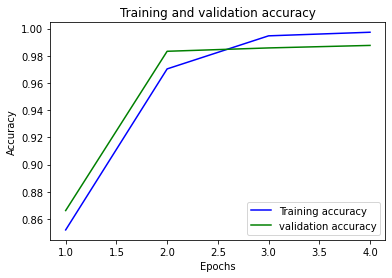

In [42]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

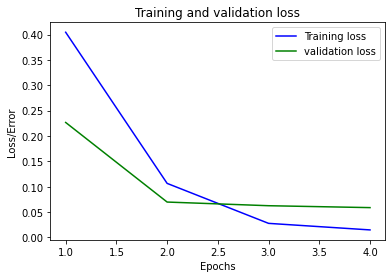

In [43]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

Metrics for stacked bi_lstm model

In [44]:
modelStackedBI_LSTM.load_weights(output_dir+"/weights.03.hdf5")
y_hat = modelStackedBI_LSTM.predict(padded_test)

51/51 [==============================] - 2s 15ms/step


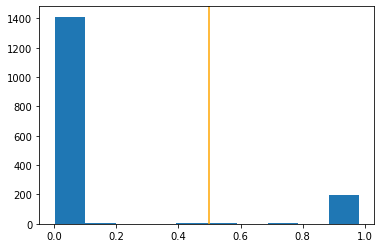

In [45]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [46]:
"{:0.2f}".format(roc_auc_score(y_test,y_hat)*100.0)

'98.65'

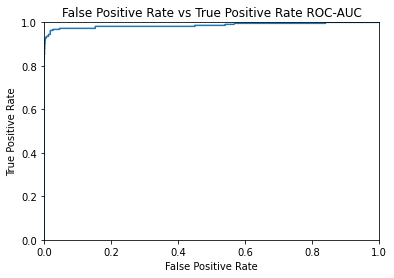

In [47]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

GRU model

load dependency for GRU model

In [48]:
from keras.layers import GRU

Hyperparameters for GRU

In [49]:
output_dir = 'model_output/gru'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 10000
max_mssg_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#GRU layer architecture: 
n_gru = 256
drop_gru = 0.2

preprocess data for GRU Model

In [50]:
padded_train = pad_sequences(encoded_train, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


GRU neural network architecture

In [51]:
modelGRU = Sequential()
modelGRU.add(Embedding(n_unique_words, n_dim, input_length = max_mssg_length))
modelGRU.add(SpatialDropout1D(drop_embed))
modelGRU.add(GRU(n_gru, dropout=drop_gru))
#model.add(Dense(n_dense, activation='relu'))
#model.add(Dropout(dropout))
modelGRU.add(Dense(1, activation='sigmoid'))

modelGRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 256)               247296    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 887,553
Trainable params: 887,553
Non-trainable params: 0
_________________________________________________________________


Configure GRU model

In [52]:
modelGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

Train GRU model

In [53]:
history = modelGRU.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/4
30/30 [==============================] - 3s 34ms/step - loss: 0.4470 - accuracy: 0.8570 - val_loss: 0.2697 - val_accuracy: 0.8662
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.1516 - accuracy: 0.9239 - val_loss: 0.0771 - val_accuracy: 0.9784
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0517 - val_accuracy: 0.9858


Evaluate

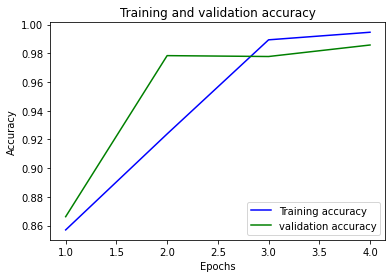

In [54]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

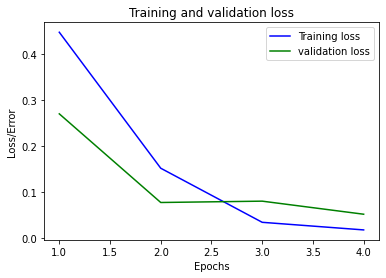

In [55]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

In [56]:
modelGRU.load_weights(output_dir+"/weights.04.hdf5")
y_hat = modelGRU.predict(padded_test)

51/51 [==============================] - 1s 5ms/step


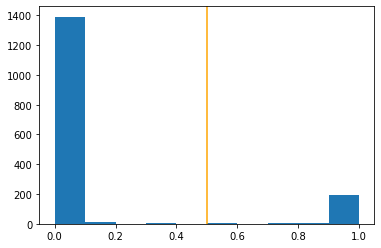

In [57]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [58]:
"{:0.2f}".format(roc_auc_score(y_test,y_hat)*100.0)

'98.81'

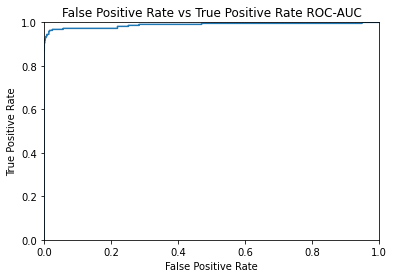

In [59]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

Multi ConvNet
(Non-Sequential)

In [60]:
from keras.models import Model 
from keras.layers import Input, concatenate
from keras.layers import GlobalMaxPooling1D

hyperparameters

In [61]:
output_dir = 'model_output/multiconv'
epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 5000
max_mssg_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#convolutional layer architecture:
n_conv_1 = n_conv_2 = n_conv_3 = 256
k_conv_1 = 3
k_conv_2 = 2
k_conv_3 = 4


Preprocess data 

In [62]:
padded_train = pad_sequences(encoded_train, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = max_mssg_length,
                        padding = pad_type, truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


model NN architecture

In [63]:
input_layer = Input(shape=(max_mssg_length,), dtype='int16', name='input')

embedding_layer = Embedding(n_unique_words, n_dim, name='embedding')(input_layer)
drop_embed_layer = SpatialDropout1D(drop_embed, name='drop_embed')(embedding_layer)

conv_1 = Conv1D(n_conv_1, k_conv_1, activation='relu', name='conv_1')(drop_embed_layer)
maxp_1 = GlobalMaxPooling1D(name='maxp_1')(conv_1)

conv_2 = Conv1D(n_conv_2, k_conv_2, activation='relu', name='conv_2')(drop_embed_layer)
maxp_2 = GlobalMaxPooling1D(name='maxp_2')(conv_2)

conv_3 = Conv1D(n_conv_3, k_conv_3, activation='relu', name='conv_3')(drop_embed_layer)
maxp_3 = GlobalMaxPooling1D(name='maxp_3')(conv_3)

concat = concatenate([maxp_1, maxp_2, maxp_3])

dense_layer = Dense(n_dense, activation='relu', name='dense')(concat)
drop_dense_layer = Dropout(dropout, name='drop_dense')(dense_layer)
dense_2 = Dense(int(n_dense/4), activation='relu', name='dense_2')(drop_dense_layer)
dropout_2 = Dropout(dropout, name='drop_dense_2')(dense_2)

predictions = Dense(1, activation='sigmoid', name='output')(dropout_2)

NonSeqModel = Model(input_layer, predictions)
NonSeqModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 400)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 400, 64)      320000      ['input[0][0]']                  
                                                                                                  
 drop_embed (SpatialDropout1D)  (None, 400, 64)      0           ['embedding[0][0]']              
                                                                                                  
 conv_1 (Conv1D)                (None, 398, 256)     49408       ['drop_embed[0][0]']             
                                                                                              

Configure model

In [64]:
NonSeqModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

Train Non sequential model

In [65]:
history = NonSeqModel.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/4
30/30 [==============================] - 6s 60ms/step - loss: 0.4992 - accuracy: 0.8224 - val_loss: 0.3792 - val_accuracy: 0.8662
Epoch 2/4
30/30 [==============================] - 1s 39ms/step - loss: 0.3907 - accuracy: 0.8615 - val_loss: 0.2641 - val_accuracy: 0.8662
Epoch 3/4
30/30 [==============================] - 1s 39ms/step - loss: 0.2383 - accuracy: 0.8610 - val_loss: 0.1495 - val_accuracy: 0.8662
Epoch 4/4
30/30 [==============================] - 1s 40ms/step - loss: 0.1502 - accuracy: 0.8617 - val_loss: 0.1310 - val_accuracy: 0.8662


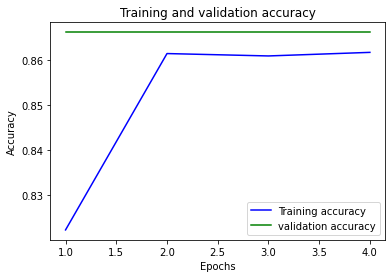

In [66]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

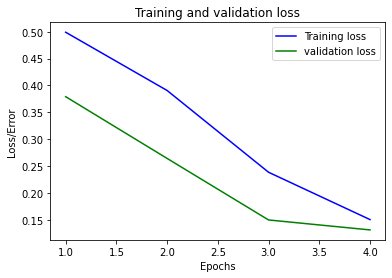

In [67]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

Evaluate

In [68]:
NonSeqModel.load_weights(output_dir+"/weights.04.hdf5")
y_hat = NonSeqModel.predict(padded_test)

51/51 [==============================] - 0s 4ms/step


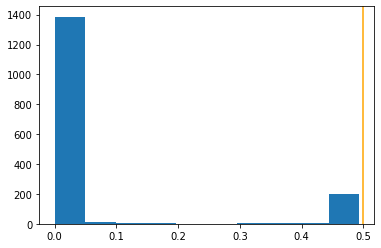

In [69]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [70]:
"{:0.2f}".format(roc_auc_score(y_test,y_hat)*100.0)

'99.42'

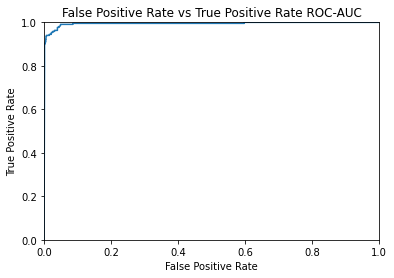

In [71]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

ConvLSTM Model 

Hyperparameters for CNN-LTSM model

In [72]:
from keras.layers import Activation, MaxPooling1D
from keras.preprocessing import sequence


In [73]:
output_dir = 'model_output/CNN-LTSM'
max_features = 20000
maxlen = 100
embedding_size = 128
# Convolution
kernel_size = 5
filters = 64
pool_size = 4
# LSTM
lstm_output_size = 70
# Training
batch_size = 128
epochs = 5

Load and Preprocess

In [74]:
padded_train = pad_sequences(encoded_train, maxlen = maxlen,
                        padding = pad_type, truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = maxlen,
                        padding = pad_type, truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


CNN-LSTSM Neural Net Arch:

In [75]:
model_CNN_LTSM = Sequential()
model_CNN_LTSM.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_CNN_LTSM.add(Dropout(0.25))
model_CNN_LTSM.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model_CNN_LTSM.add(MaxPooling1D(pool_size=pool_size))
model_CNN_LTSM.add(LSTM(lstm_output_size))
model_CNN_LTSM.add(Dense(1))
model_CNN_LTSM.add(Activation('sigmoid'))
model_CNN_LTSM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            41024     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 70)                37800     
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                      

In [76]:
model_CNN_LTSM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [77]:
history = model_CNN_LTSM.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/5
30/30 [==============================] - 3s 41ms/step - loss: 0.3738 - accuracy: 0.8655 - val_loss: 0.2366 - val_accuracy: 0.8662
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1304 - accuracy: 0.9471 - val_loss: 0.0851 - val_accuracy: 0.9790
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.0290 - accuracy: 0.9918 - val_loss: 0.0587 - val_accuracy: 0.9852
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.0115 - accuracy: 0.9976 - val_loss: 0.0583 - val_accuracy: 0.9858
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0532 - val_accuracy: 0.9834


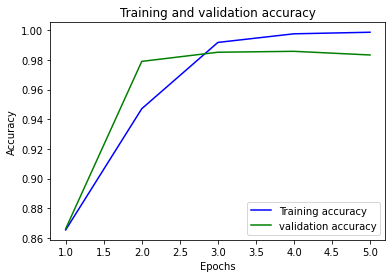

In [78]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

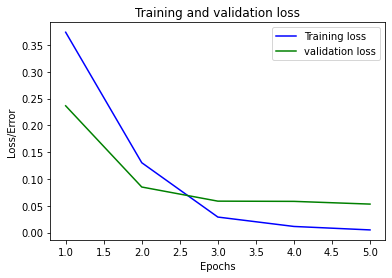

In [79]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

In [80]:
model_CNN_LTSM.load_weights(output_dir+"/weights.05.hdf5")
y_hat = model_CNN_LTSM.predict(padded_test)

51/51 [==============================] - 1s 4ms/step


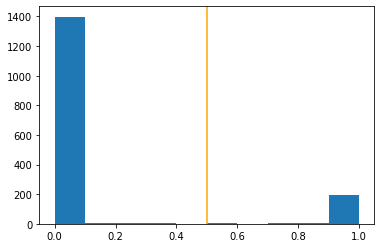

In [81]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [82]:
"{:0.2f}".format(roc_auc_score(y_test,y_hat)*100.0)

'98.80'

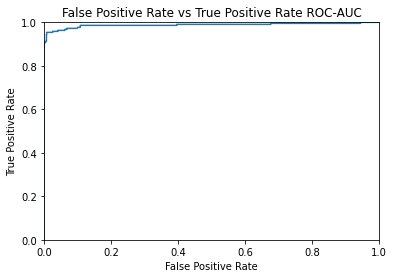

In [83]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

3.) Tune the model that performed best
*For us that is the CNN-LSTM model
*It has the 2nd highest ROC-AUC score of 98.82 and the reason this is still the best model is because the training validation graphs, and the training loss graphs indicate the best results of training the data of all the models, even though the Multi-ConvNet technically had a higher ROC-AUC score. 

In [84]:
output_dir = 'model_output/CNN-LTSM-TUNED'
max_features = 20000
maxlen = 100
embedding_size = 128
# Convolution
kernel_size = 5
filters = 256
pool_size = 4
# LSTM
lstm_output_size = 256
# Training
batch_size = 128
epochs = 20

In [85]:
padded_train = pad_sequences(encoded_train, maxlen = maxlen,
                        padding = pad_type, truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = maxlen,
                        padding = pad_type, truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


In [86]:
model_CNN_LTSM_TUNED = Sequential()
model_CNN_LTSM_TUNED.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_CNN_LTSM_TUNED.add(Dropout(0.25))
model_CNN_LTSM_TUNED.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 activation='relu',
                 strides=1))
model_CNN_LTSM_TUNED.add(MaxPooling1D(pool_size=pool_size))
model_CNN_LTSM_TUNED.add(LSTM(lstm_output_size))
model_CNN_LTSM_TUNED.add(Dense(1))
model_CNN_LTSM_TUNED.add(Activation('sigmoid'))
model_CNN_LTSM_TUNED.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 256)          164096    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 25, 256)          0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 256)               525312    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                      

In [87]:
model_CNN_LTSM_TUNED.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [88]:
history = model_CNN_LTSM_TUNED.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/20
30/30 [==============================] - 3s 36ms/step - loss: 0.2726 - accuracy: 0.8988 - val_loss: 0.0978 - val_accuracy: 0.9753
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.0529 - val_accuracy: 0.9840
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0525 - val_accuracy: 0.9871
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0672 - val_accuracy: 0.9858
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0580 - val_accuracy: 0.9871
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0572 - val_accuracy: 0.9877
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 7.5940e-04 - accuracy: 0.9997 - val_loss: 0.0626 - val_accuracy: 0.9889
Epoch 8/2

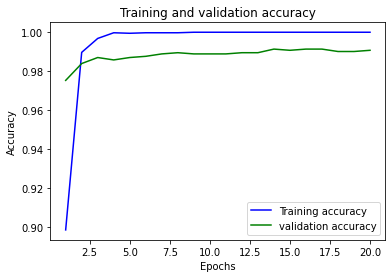

In [89]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

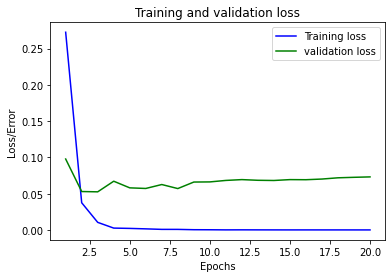

In [90]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

In [91]:
model_CNN_LTSM_TUNED.load_weights(output_dir+"/weights.20.hdf5")
y_hat = model_CNN_LTSM_TUNED.predict(padded_test)

51/51 [==============================] - 1s 4ms/step


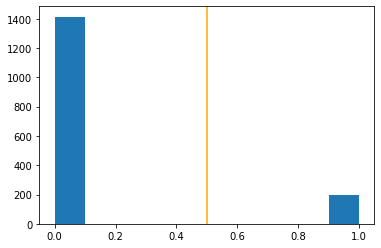

In [92]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [93]:
"{:0.2f}".format(roc_auc_score(y_test,y_hat)*100.0)

'98.99'

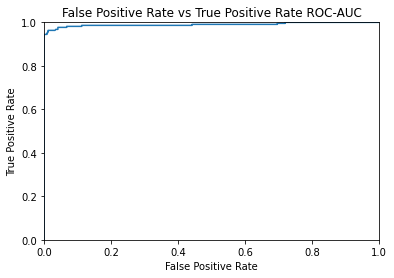

In [94]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

4.) Compare the all 9 models from this assignment and the last

I found between all 9 models that we've created the CNN model performed the best while arguably the CNN-LSTM model was a close second. The multi Conv network model also had the highest ROC-AUC score however, the data was skewed. Tuning the epochs more accurately fit our models